In [1]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

/home/casapanshop/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
y_train[0]

array([19])

In [5]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

keyboard


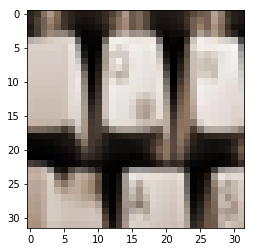

In [19]:
import matplotlib.pyplot as plt
i = 15
print(CIFAR100_LABELS_LIST[y_train[i][0]])
plt.imshow(x_train[i])
plt.show()

In [2]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)

## Normal trainig

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [81]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
__________

In [80]:
optimizer_ = keras.optimizers.SGD(lr=0.001,momentum=0.9) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, nb_epoch=12, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
 5888/50000 [==>...........................] - ETA: 15s - loss: 4.6114 - acc: 0.0112

KeyboardInterrupt: 

In [82]:
optimizer_ = keras.optimizers.SGD(lr=0.01,momentum=0.9) #probar con lr =0.1 sino gg
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, nb_epoch=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 241us/step - loss: 4.3803 - acc: 0.0417 - val_loss: 3.9261 - val_acc: 0.1070
Epoch 2/15
50000/50000 [==============================] - 10s 201us/step - loss: 3.8220 - acc: 0.1171 - val_loss: 3.5267 - val_acc: 0.1739
Epoch 3/15
50000/50000 [==============================] - 10s 206us/step - loss: 3.4593 - acc: 0.1766 - val_loss: 3.2071 - val_acc: 0.2358
Epoch 4/15
50000/50000 [==============================] - 10s 206us/step - loss: 3.1303 - acc: 0.2400 - val_loss: 2.9454 - val_acc: 0.2828
Epoch 5/15
50000/50000 [==============================] - 10s 205us/step - loss: 2.8717 - acc: 0.2886 - val_loss: 2.7466 - val_acc: 0.3213
Epoch 6/15
50000/50000 [==============================] - 10s 199us/step - loss: 2.6496 - acc: 0.3307 - val_loss: 2.5653 - val_acc: 0.3541
Epoch 7/15
50000/50000 [==============================] - 10s 203us/step - loss: 2.4342 - acc: 0.3780 - val_loss: 2.

In [162]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.4068)


In [ ]:
#donde dropout?

## autoencoder pre training

In [23]:
#model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
#model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

from keras.layers import Input
from keras.models import Model

input_img = Input(shape=x_train.shape[1:])

encoded1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
#x = MaxPooling2D((2, 2), border_mode='same')(x)
#x = Conv2D(8, 3, 3, activation='relu', border_mode='same')(x)$
#encoded = MaxPooling2D((2, 2))(x)

decoded1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(encoded1)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, 3, 3, activation='relu', border_mode='same')(x)
#x = UpSampling2D((2, 2))(x)
#decoded = Conv2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder1.summary()

autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 3)         867       
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 185us/step - loss: 0.5555 - val_loss: 0.5309
Epoch 2/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.5310 - val_loss: 0.5294
Epoch 3/15
50000/50000 [==============================] - 8s 170us/step - loss: 0.5302 - val_loss: 0.5291
Epoch 4/15
50000/50000 [============

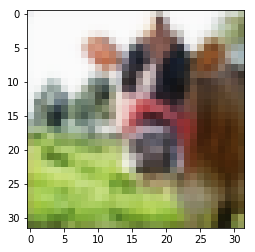

In [26]:
import matplotlib.pyplot as plt
plt.imshow(autoencoder1.predict(x_train[:10])[0])
plt.show()

In [5]:
from keras.models import load_model
encoder1 = load_model("encoder_layer1.h5")

/home/casapanshop/anaconda2/lib/python2.7/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
x_train_encoded1 = encoder1.predict(x_train) #FORWARD PASS DATA THROUGH FIRST ENCODER
#x_test_encoded1 = encoder1.predict(x_test)

In [58]:
autoencoder1.input

<tf.Tensor 'input_12:0' shape=(?, 32, 32, 3) dtype=float32>

In [66]:
###AUTOENCODER 2
#x_train_encoded1 = encoder1.predict(x_train) #FORWARD PASS DATA THROUGH FIRST ENCODER
#x_test_encoded1 = encoder1.predict(x_test)


#input_img2 = Input(shape=encoder1.output_shape)#x_train_encoded1.shape[1:])
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded1) #sin filtros ni activaciones
decoded2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded2) #sin foltros ni activaciones
#finish autoencoder2
decoded1 = autoencoder1.layers[-1](decoded2)


autoencoder2 = Model(autoencoder1.input, decoded1) #all model

#primer autoencoder fijo
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False

autoencoder2.compile(optimizer='adam', loss='mse')
autoencoder2.summary()

autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128,validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#encoder2.save('encoder_layer2.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 3)         867       
Total params: 20,259
Trainable params: 18,496
Non-trainable params: 1,763
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 217us/step - loss: 0.0

In [83]:
#FINE TUNNING
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
#...#rest of the model
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
__________

In [74]:
optimizer_ = keras.optimizers.SGD(lr=0.001,momentum=0.9) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 220us/step - loss: 1.9828 - acc: 0.4754 - val_loss: 2.5458 - val_acc: 0.3751
Epoch 2/15
50000/50000 [==============================] - 10s 209us/step - loss: 1.9276 - acc: 0.4863 - val_loss: 2.5223 - val_acc: 0.3797
Epoch 3/15
50000/50000 [==============================] - 10s 202us/step - loss: 1.8734 - acc: 0.4965 - val_loss: 2.5309 - val_acc: 0.3808
Epoch 4/15
50000/50000 [==============================] - 10s 198us/step - loss: 1.8094 - acc: 0.5133 - val_loss: 2.5425 - val_acc: 0.3793
Epoch 5/15
50000/50000 [==============================] - 10s 199us/step - loss: 1.7526 - acc: 0.5237 - val_loss: 2.5217 - val_acc: 0.3900
Epoch 6/15
50000/50000 [==============================] - 10s 198us/step - loss: 1.7020 - acc: 0.5375 - val_loss: 2.5517 - val_acc: 0.3869
Epoch 7/15
50000/50000 [==============================] - 10s 200us/step - loss: 1.6378 - acc: 0.5512 - val_loss: 2.

In [84]:
optimizer_ = keras.optimizers.SGD(lr=0.01,momentum=0.9) #probar con lr =0.1 sino gg
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 228us/step - loss: 4.1847 - acc: 0.0677 - val_loss: 3.6828 - val_acc: 0.1488
Epoch 2/15
50000/50000 [==============================] - 10s 203us/step - loss: 3.5751 - acc: 0.1623 - val_loss: 3.2868 - val_acc: 0.2164
Epoch 3/15
50000/50000 [==============================] - 10s 202us/step - loss: 3.2138 - acc: 0.2268 - val_loss: 3.0133 - val_acc: 0.2741
Epoch 4/15
50000/50000 [==============================] - 10s 199us/step - loss: 2.9405 - acc: 0.2766 - val_loss: 2.7977 - val_acc: 0.3075
Epoch 5/15
50000/50000 [==============================] - 10s 198us/step - loss: 2.6887 - acc: 0.3296 - val_loss: 2.6567 - val_acc: 0.3383
Epoch 6/15
50000/50000 [==============================] - 10s 199us/step - loss: 2.4533 - acc: 0.3745 - val_loss: 2.5309 - val_acc: 0.3641
Epoch 7/15
50000/50000 [==============================] - 10s 199us/step - loss: 2.2378 - acc: 0.4178 - val_loss: 2.

In [85]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.4046)


## Transfer learning pre training

In [87]:
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten,Dropout
from keras.optimizers import SGD
from keras.applications import VGG16

#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)

58900480/58889256 [==============================] - 13s 0us/step


In [29]:
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [40]:
features_test = modelVGG.predict(x_test)

In [88]:
from keras.layers import BatchNormalization
#https://keras.io/layers/normalization/

In [89]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,nb_epoch=20, batch_size=128,verbose=1,validation_data=(features_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               102500    
Total params: 633,956
Trainable params: 630,884
Non-trainable params: 3,072
_________________________________________________________________


In [57]:
score = model.evaluate(features_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.3852)


### fine tunning the last layers of vgg?

In [91]:
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )

salida_vgg = modelVGG.get_layer('block4_pool').output_shape

model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
import numpy as np
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop()
    model.layers[i].set_weights(last.get_weights())
    
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              525312    
__________

In [92]:
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)

In [155]:
features_train.shape

(50000, 2, 2, 512)

In [93]:
#ejecucion con 1060
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,nb_epoch=20, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 302us/step - loss: 3.5809 - acc: 0.2015 - val_loss: 4.7692 - val_acc: 0.1631
Epoch 2/20
50000/50000 [==============================] - 13s 253us/step - loss: 2.7858 - acc: 0.3194 - val_loss: 3.2118 - val_acc: 0.2866
Epoch 3/20
50000/50000 [==============================] - 12s 250us/step - loss: 2.5351 - acc: 0.3682 - val_loss: 2.6870 - val_acc: 0.3395
Epoch 4/20
50000/50000 [==============================] - 13s 259us/step - loss: 2.3536 - acc: 0.3985 - val_loss: 2.7065 - val_acc: 0.3362
Epoch 5/20
50000/50000 [==============================] - 13s 255us/step - loss: 2.2071 - acc: 0.4284 - val_loss: 2.4731 - val_acc: 0.3952
Epoch 6/20
50000/50000 [==============================] - 12s 246us/step - loss: 2.1143 - acc: 0.4436 - val_loss: 2.4339 - val_acc: 0.3989
Epoch 7/20
50000/50000 [==============================] - 12s 243us/step - loss: 1.9857 - acc: 0.4658 - val_loss: 2.

In [154]:
optimizer_ = SGD(lr=0.01,momentum=0.9,decay=1e-6)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,nb_epoch=20, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 71s 1ms/step - loss: 3.5162 - acc: 0.2141 - val_loss: 4.5538 - val_acc: 0.1687
Epoch 2/20
50000/50000 [==============================] - 68s 1ms/step - loss: 2.7403 - acc: 0.3285 - val_loss: 3.3330 - val_acc: 0.2599
Epoch 3/20
50000/50000 [==============================] - 70s 1ms/step - loss: 2.4660 - acc: 0.3810 - val_loss: 3.0097 - val_acc: 0.3091
Epoch 4/20
50000/50000 [==============================] - 69s 1ms/step - loss: 2.3159 - acc: 0.4078 - val_loss: 2.3625 - val_acc: 0.3901
Epoch 5/20
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1864 - acc: 0.4350 - val_loss: 2.6770 - val_acc: 0.3600
Epoch 6/20
50000/50000 [==============================] - 69s 1ms/step - loss: 2.0560 - acc: 0.4586 - val_loss: 2.2441 - val_acc: 0.4212
Epoch 7/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.9507 - acc: 0.4754 - val_loss: 2.6159 - val_acc

In [156]:
score = model.evaluate(features_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.4643)
